In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [17]:
%matplotlib notebook

In [35]:
def make_surface_proj(arr_1):
     
    full_atom_box = np.zeros((32,32,256))
    for i,j,k in arr_1:
        full_atom_box[int(i),int(j),int(k)]=1
    surface_proj = np.zeros(shape=(full_atom_box.shape[0], full_atom_box.shape[1]))
    for i in range(surface_proj.shape[0]):
        for j in range(surface_proj.shape[1]):
            try:
                surface_proj[i,j] = np.max(np.where(full_atom_box[i,j,:]==1))
            except ValueError:
                surface_proj[i,j] = 0
    return surface_proj

In [36]:
folder= r'D:\kmcsim_env\data\working'
output_file = r'output.xyz'

output_arr = np.loadtxt(os.path.join(folder, output_file),skiprows = 2)



<IPython.core.display.Javascript object>


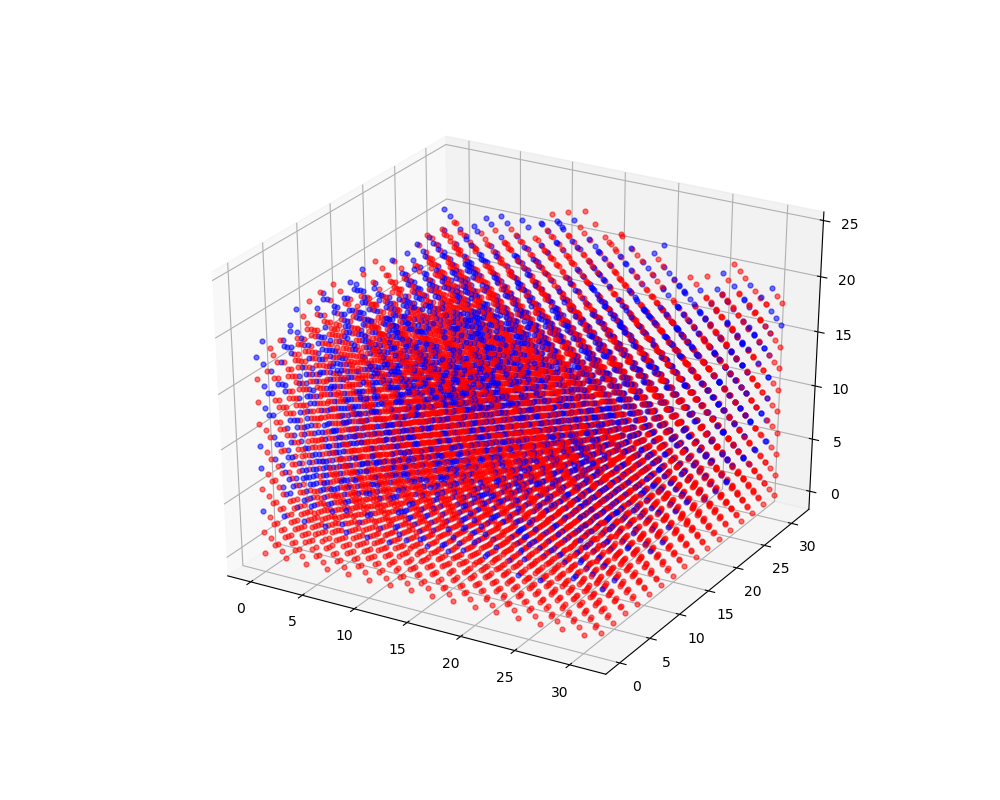

In [39]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')

for xyz_atom in output_arr:
    
    if xyz_atom[-1]==0: mcolor = 'r'
    else:mcolor = 'b'
    
    ax.scatter(xyz_atom[1],xyz_atom[2], xyz_atom[3], c= mcolor, alpha = 0.55, s = 12)

<IPython.core.display.Javascript object>


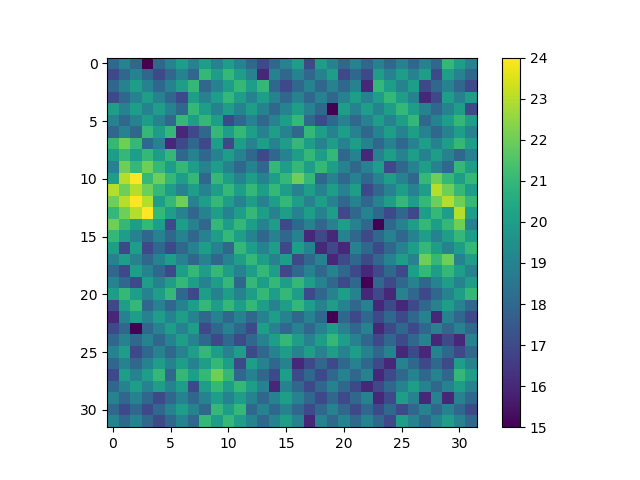

In [40]:
out = make_surface_proj(output_arr[:,1:4])
plt.figure()
plt.imshow(out, interpolation='none')
plt.colorbar()

<IPython.core.display.Javascript object>


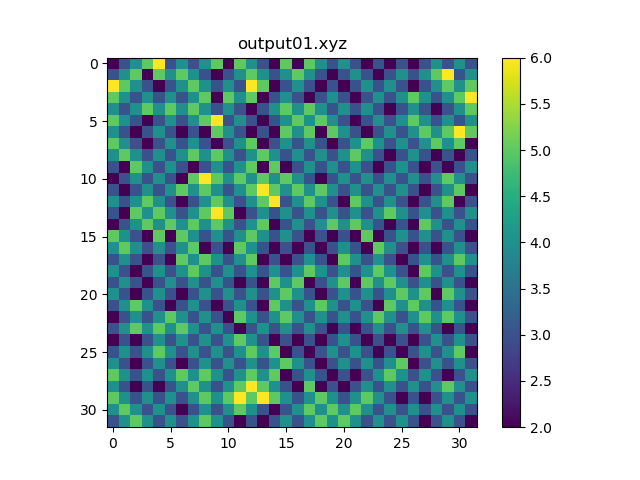

<IPython.core.display.Javascript object>


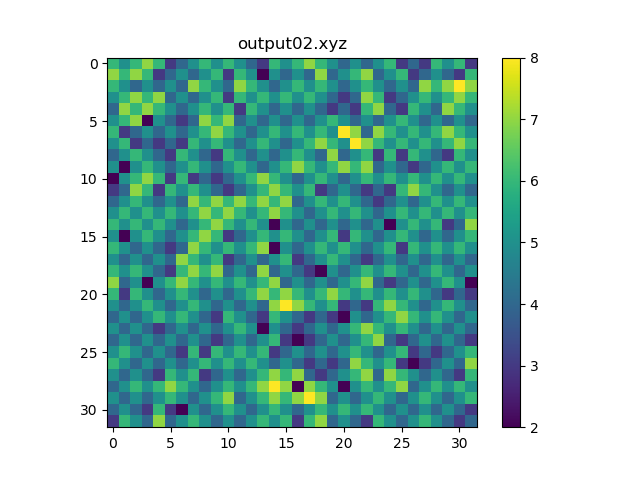

<IPython.core.display.Javascript object>


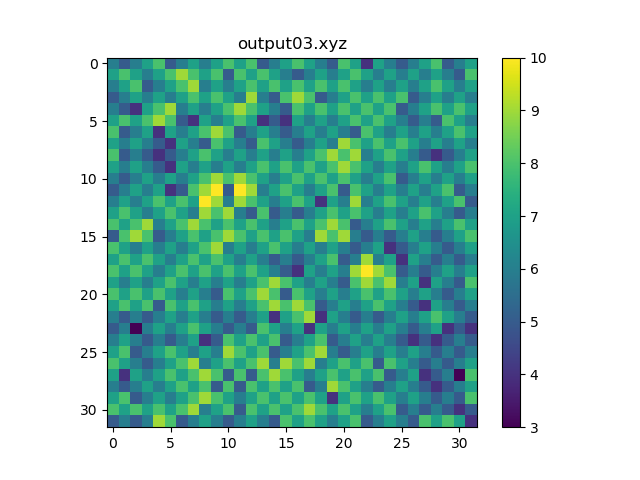

<IPython.core.display.Javascript object>


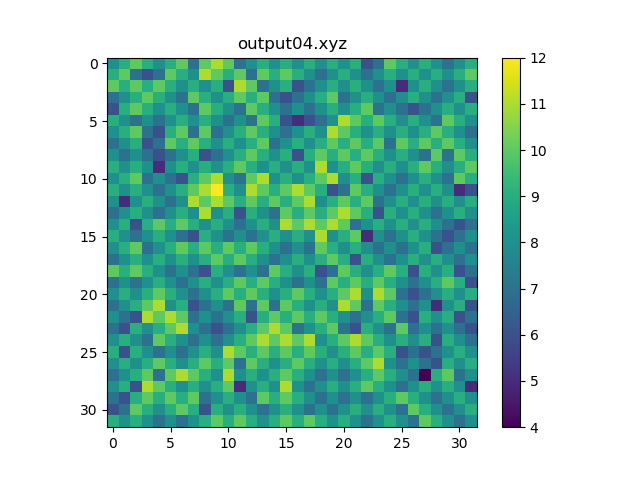

<IPython.core.display.Javascript object>


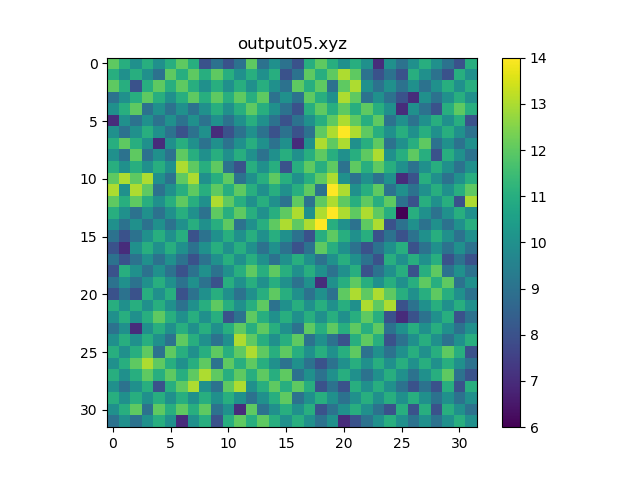

<IPython.core.display.Javascript object>


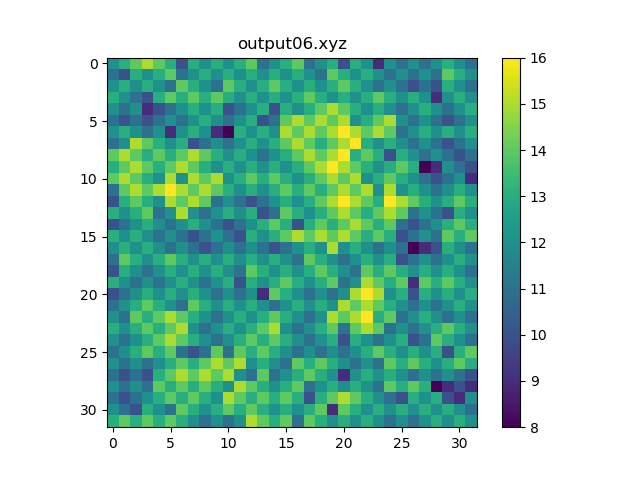

<IPython.core.display.Javascript object>


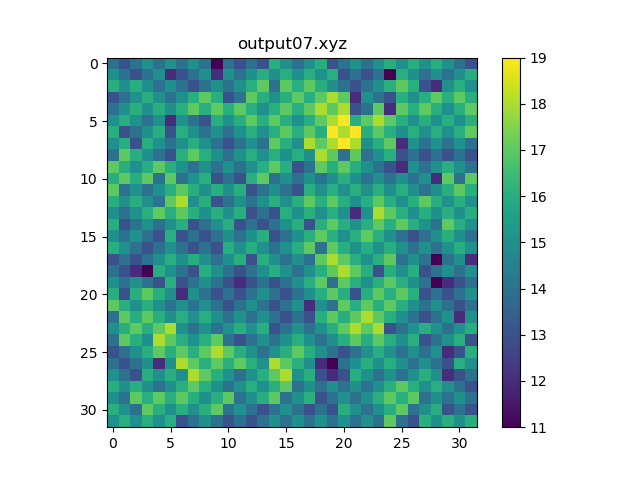

<IPython.core.display.Javascript object>


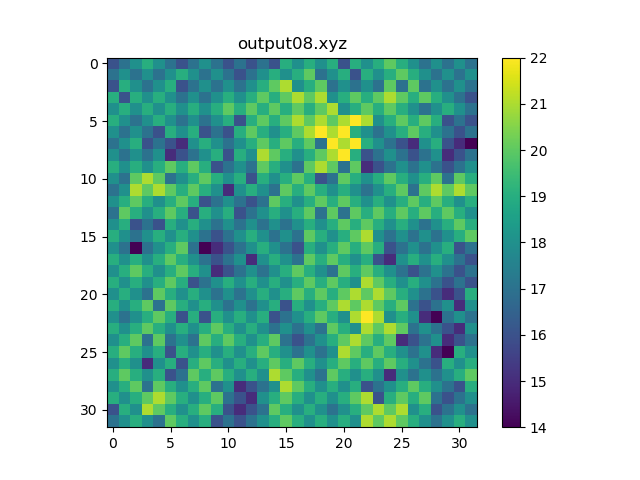

<IPython.core.display.Javascript object>


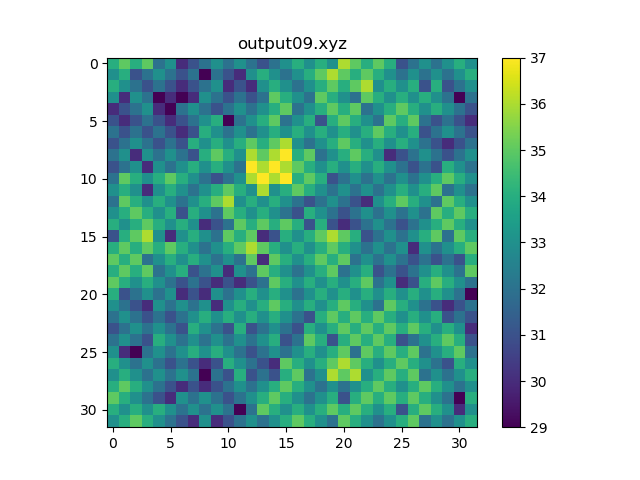

<IPython.core.display.Javascript object>


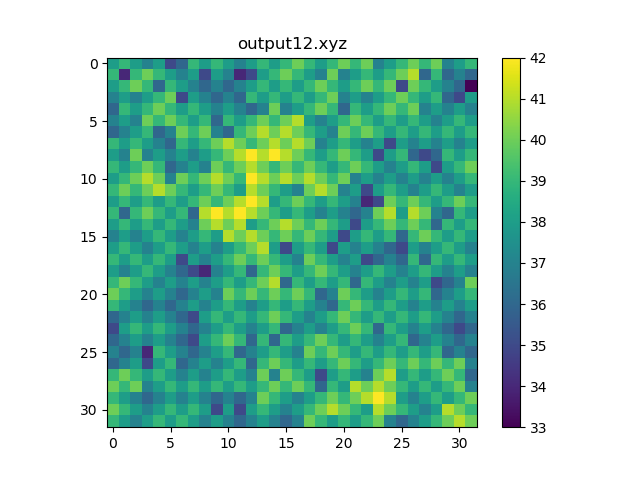

In [46]:
folder= r'D:\kmcsim_env\data\working'
output_file = [filename for filename in os.listdir(folder) if 'output' in filename]

all_arr = []

for out_file in output_file:
    output_arr = np.loadtxt(os.path.join(folder, out_file),skiprows = 2)
    out = make_surface_proj(output_arr[:,1:5])    
    all_arr.append(out - out.min())

In [47]:
output_file

['output01.xyz',
 'output02.xyz',
 'output03.xyz',
 'output04.xyz',
 'output05.xyz',
 'output06.xyz',
 'output07.xyz',
 'output08.xyz',
 'output09.xyz',
 'output12.xyz']

In [49]:
all_arr = np.array(all_arr)
all_arr.shape

(10, 32, 32)

In [51]:
%matplotlib inline

Text(0, 0.5, 'Height')

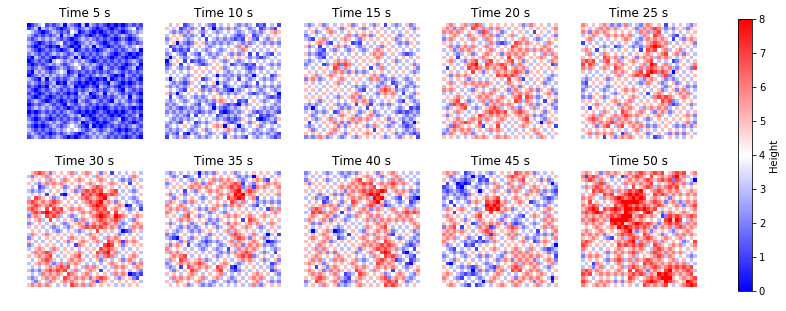

In [66]:
fig, axes = plt.subplots(nrows=2,ncols=5, figsize = (15,5))

for ind, ax in enumerate(axes.flat):
    im = ax.imshow(all_arr[ind,:,:], vmin = 0, vmax = 8, cmap = plt.cm.bwr)
    ax.axis('off')
    ax.set_title('Time {} s'.format((ind+1)*5))

cbar = fig.colorbar(im, ax=axes.flat)
cbar.ax.set_ylabel('Height')


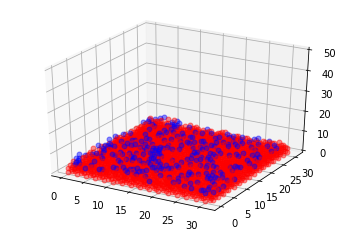

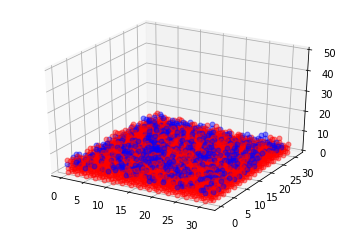

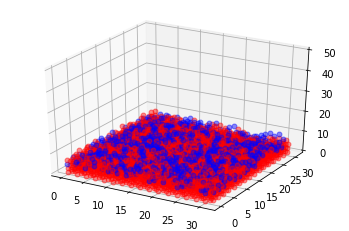

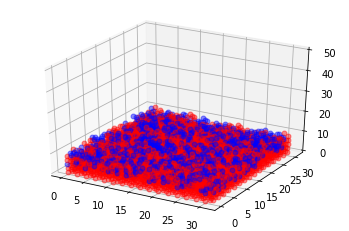

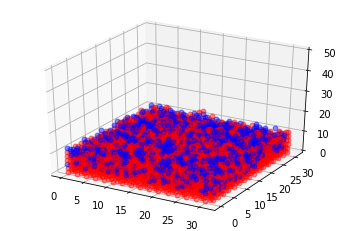

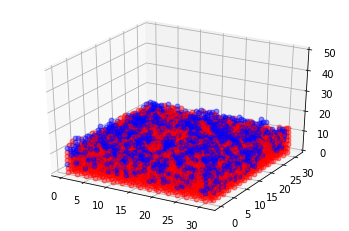

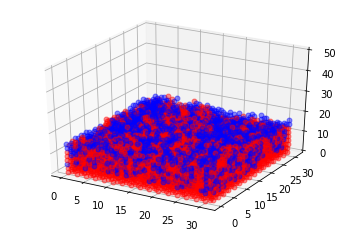

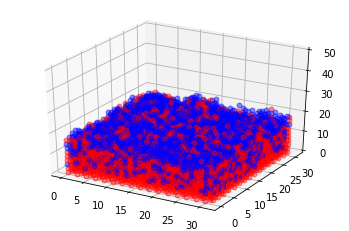

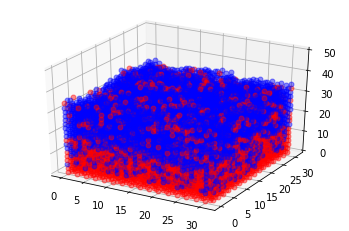

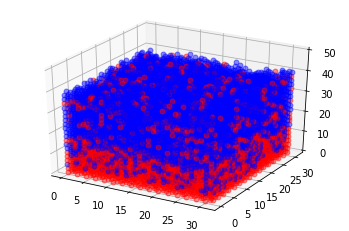

In [83]:
#fig, axes = plt.subplots(nrows=2,ncols=5, figsize=(15,5))

for ind,out_file in enumerate(output_file):
    output_arr = np.loadtxt(os.path.join(folder, out_file),skiprows = 2)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for xyz_atom in output_arr:

        if xyz_atom[-1]==0: mcolor = 'r'
        else:mcolor = 'b'

        ax.scatter(xyz_atom[1],xyz_atom[2], xyz_atom[3], c= mcolor, alpha = 0.45, s = 24)
    ax.set_zlim([0, 50])
    
    fig.savefig('myfig_'+str(ind) + '.png', dpi = 300)